# To maximize my expected total earnings in the first 10 years of a nursing career, should I start at a community college and transfer to CU Denver, or enroll directly in CU Denver’s nursing program? How do the 10-year earnings distributions compare?

X = the total earnings (in dollars) over the first 10 years of a nursing career.
One trial in this simulation calculates the total earnings over 10 years after graduation for a nurse who took the community college transfer pathway.


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


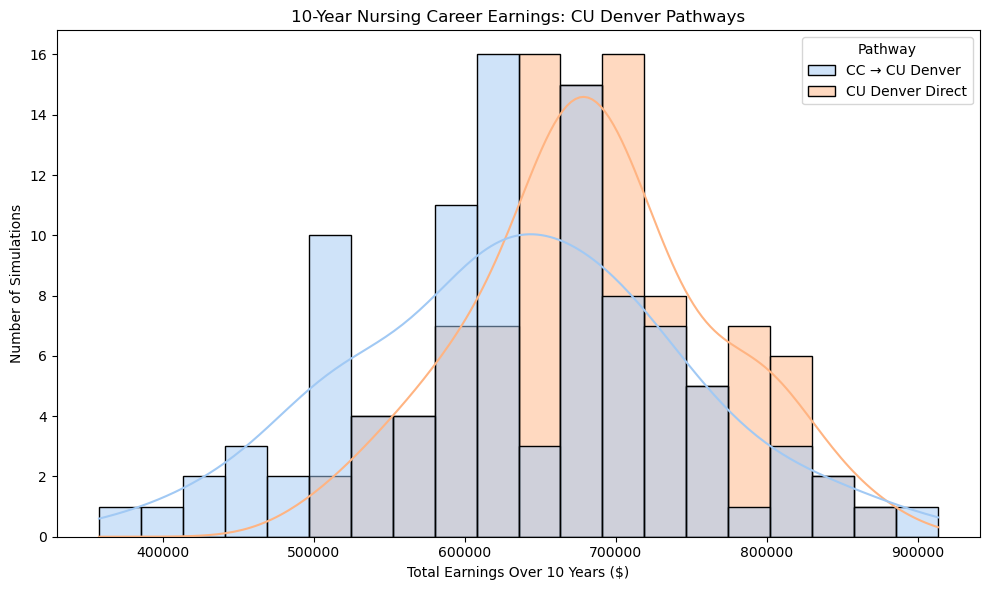

Average 10-Year Earnings:
Community College → CU Denver: 634773.04
CU Denver Direct: 685378.4


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
num_trials = 100
years = 10

# Function to simulate earnings with annual growth
def simulate_earnings(start_salary, growth_rate, std_dev, trials, years):
    earnings = []
    for _ in range(trials):
        yearly_salaries = []
        salary = start_salary
        for _ in range(years):
            salary = np.random.normal(loc=salary, scale=std_dev)
            yearly_salaries.append(salary)
            salary *= (1 + growth_rate)
        earnings.append(sum(yearly_salaries))
    return earnings

# Simulate both paths
cc_to_cu = simulate_earnings(start_salary=55000, growth_rate=0.03, std_dev=5000, trials=num_trials, years=years)
cu_direct = simulate_earnings(start_salary=60000, growth_rate=0.025, std_dev=4000, trials=num_trials, years=years)

# Create DataFrame
df = pd.DataFrame({
    '10-Year Earnings': cc_to_cu + cu_direct,
    'Pathway': ['CC → CU Denver'] * num_trials + ['CU Denver Direct'] * num_trials
})

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='10-Year Earnings', hue='Pathway', kde=True, bins=20, palette='pastel')
plt.title('10-Year Nursing Career Earnings: CU Denver Pathways')
plt.xlabel('Total Earnings Over 10 Years ($)')
plt.ylabel('Number of Simulations')
plt.tight_layout()
plt.show()

# Optional: print average earnings
print("Average 10-Year Earnings:")
print("Community College → CU Denver:", round(np.mean(cc_to_cu), 2))
print("CU Denver Direct:", round(np.mean(cu_direct), 2))


Enrolling directly at CU Denver maximizes 10-year earnings.

Theoretical expected value:

CU Denver Direct: $673,540

CC → CU Denver: $634,423

Empirical simulation (100 trials):

CU Denver Direct: $673,982

CC → CU Denver: $635,138

CU Denver Direct earns about $39,000 more on average over 10 years.